<figure>
<IMG SRC="../../lectures/images/PhysicsLogo.jpg" WIDTH=100 ALIGN="right">
</figure>
# [Physics 411](http://jklymak.github.io/Phy411/) Time Series Analysis
*Jody Klymak*


# Assignment 3

## Q1: Lag correlations of weather time series

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib nbagg


hourdata=np.genfromtxt('http://web.uvic.ca/~jklymak/Phy411/Data/AllHourly.txt')[[6,28],2:]
dc = hourdata[0,:]
jb=hourdata[1,:]

dc = dc[~np.isnan(dc)] #used to remove 'nan' values from data
jb = jb[~np.isnan(jb)] #used to remove 'nan' values from data

**1** From the hourly time series at Deep Cove (`dc`), calculate the *lag correlation co-efficient* $\rho_{xx}(\tau)$ out to a lag of $\tau=30\ \mathrm{days}$ (Remember this data is hourly!).  (also remember to remove the mean of $dc$ before trying to do the calculations).  

Comment on the resulting plot.

<IPython.core.display.Javascript object>


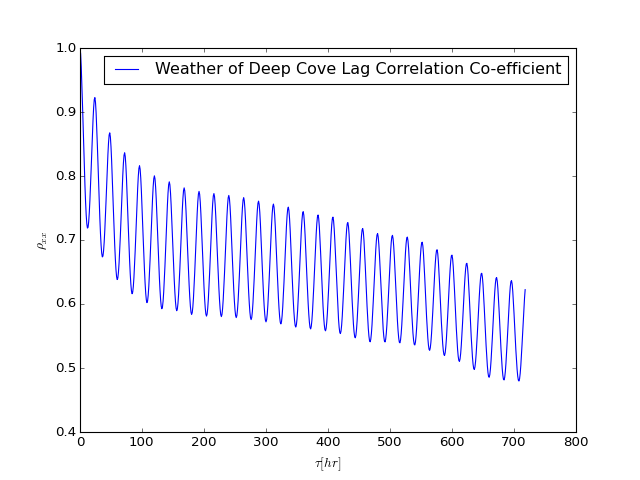

In [2]:
newdc = dc - np.mean(dc)
lags = range(0,719) # the lags are integers
#719 is chosen because 720 hours is 30 days, 0 is counted as the first hour so 0-719 are taken as 30 days from Deep Cove
cxx = 0.*np.array(lags)
for ind,tau in enumerate(lags):
    if tau<0:
        cxx[ind]=np.mean(newdc[:tau]*newdc[-tau:])
    elif tau==0:
        cxx[ind]=np.mean(newdc*newdc)
    else:
        cxx[ind]=np.mean(newdc[:-tau]*newdc[tau:])
fig,ax=plt.subplots(1,1)
ax.plot(lags,cxx/np.var(newdc),label='Weather of Deep Cove Lag Correlation Co-efficient')
ax.legend(loc=0)
ax.set_xlabel(r'$\tau [hr]$')
ax.set_ylabel(r'$\rho_{xx}$')

The plot is oscillating indicating that that times it has less lag than other times. However it has no lag when $\tau$ is 0, since this should be the case because there is no lag at that pont.

*2* Now, instead of doing the whole year, look at just the winter months and the summer months and compare the lag correlations (no need to do this for the whole time series, just choose one winter and one summer).  Make sure to indicate which lag correlation is which on the plots.

Comment below on the different charcter of these two lag correlations.

<IPython.core.display.Javascript object>


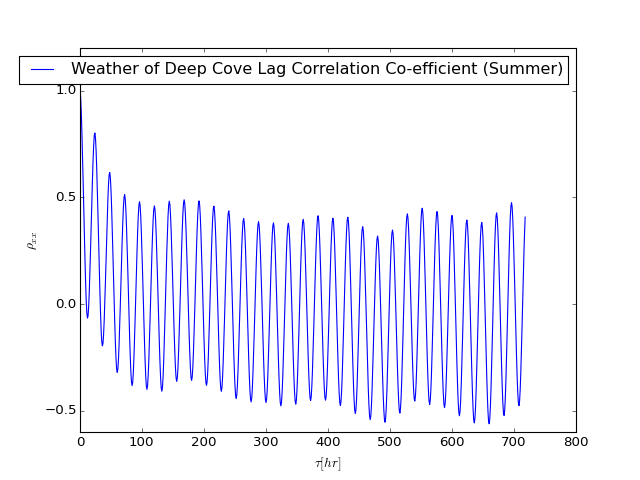

<IPython.core.display.Javascript object>


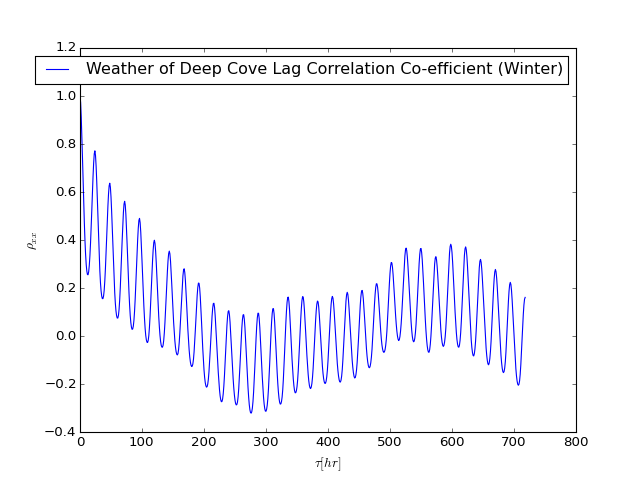

In [3]:
# Assuming the data is taken hourly, and Winter begins in December and Summer begins in July.
# Taking Winter and Summer to be 3 months and calculating the co-efficient for 30 days again
# This data is assumed to be taken from October 4 at 4:00pm.
# Winter begins on December 1 12:00am and continues to March 1 12:00am, wdc
# Summer begins on June 1 12:00am abd continues to September 1 12:00am, sdc

sdc = dc[3599:5807]
wdc = dc[8015:10175]
ssdc = sdc - np.mean(sdc)
wwdc = wdc - np.mean(wdc)
cxx1 = 0.*np.array(lags)
cxx2 = 0.*np.array(lags)
for ind,tau in enumerate(lags):
    if tau<0:
        cxx1[ind]=np.mean(ssdc[:tau]*ssdc[-tau:])
        cxx2[ind]=np.mean(wwdc[:tau]*wwdc[-tau:])
    elif tau==0:
        cxx1[ind]=np.mean(ssdc*ssdc)
        cxx2[ind]=np.mean(wwdc*wwdc)
    else:
        cxx1[ind]=np.mean(ssdc[:-tau]*ssdc[tau:])
        cxx2[ind]=np.mean(wwdc[:-tau]*wwdc[tau:])        
fig,ax=plt.subplots(1,1)
ax.plot(lags,cxx1/np.var(ssdc),label='Weather of Deep Cove Lag Correlation Co-efficient (Summer)')
ax.legend(loc=0)
ax.set_xlabel(r'$\tau [hr]$')
ax.set_ylabel(r'$\rho_{xx}$')

fig,ax=plt.subplots(1,1)
ax.plot(lags,cxx2/np.var(wwdc),label='Weather of Deep Cove Lag Correlation Co-efficient (Winter)')
ax.legend(loc=0)
ax.set_xlabel(r'$\tau [hr]$')
ax.set_ylabel(r'$\rho_{xx}$')

The two plots are similar in that they both appear to be oscillating. However, the winter graph dips down and come sback up while the summer plot has a slow progression downwards.

## Q2 Emperically show that the expected value of a finite spectrum approaches the true spectrum as T goes to infinity.

**1** Consider the process $x(t) = \int_{t-b}^t y(t) \ \mathrm{dt}$ where $y(t)$ is uncorrelated white noise so that $R_{yy}(\tau)=\delta(\tau)$.  Using the definition of $R_{xx}(\tau)$, and the fact that expectation values (and integration) are linear operators, analytically show that this is a triangle function: 

\begin{equation}
    R_{xx}(\tau)=
    \begin{cases}
        b-|\tau| & |\tau|<b\\
        0 & |\tau|\geq b
    \end{cases}
\end{equation}

Begin by using the definition of $R_{xx}(\tau)$
\begin{equation}
    R_{xx}(\tau) = E[x(t)x(t+\tau)] 
\end{equation}
Substituting in x(t) respectively
\begin{equation}
    R_{xx}(\tau) = E[\int_{t-b}^{t} y(t)dt \int_{t+\tau-b}^{t+\tau}y(t+\tau)d\tau]
\end{equation}
By bringing in the expectation value and allowing y(t) to be brought into the $\tau$ integral, we get
\begin{equation}
    R_{xx}(\tau) = \int_{t-b}^{t} \int_{t+\tau-b}^{t+\tau} E[y(t)y(t+\tau)]d\tau dt
\end{equation}
By using the $R_{yy}(\tau) = \delta(\tau)$, we get
\begin{equation}
    R_{xx}(\tau) = \int_{t-b}^{t} \int_{t+\tau-b}^{t+\tau} \delta(\tau)d\tau dt
\end{equation}
By taking the integral of $\tau$, we are left with a integral of $t$. This integral has new bound depedning on the values of $\tau$. If |$\tau$| < b, then the new integral bounds are 0 to b-$|\tau|$. If |$\tau$| $\geq$ b, then the bounds are 0 to 0, thus giving a value of 0. So in the end we get:
\begin{equation}
    R_{xx}(\tau)=
    \begin{cases}
        b-|\tau| & |\tau|<b\\
        0 & |\tau|\geq b
    \end{cases}
\end{equation}

**2** Show emperically that you have the right *lag auto correlation* by computing the lag correlation of a random discrete timeseries $x(t)$. 

Hint: have a look at `np.convolve` to do the integration. 

Hint 2: Make sure your time series is long enough to get a nice representation of $R_{xx}(\tau)$.  Show what happens if N is too small and what happens if it gets larger. To do this well,  I used `N in [500, 5000, 50000, 5e6]`, but my machine has a good amount of memory.  Don't *test* on the bigger values, as it is slow, just add them for the final product!

<IPython.core.display.Javascript object>


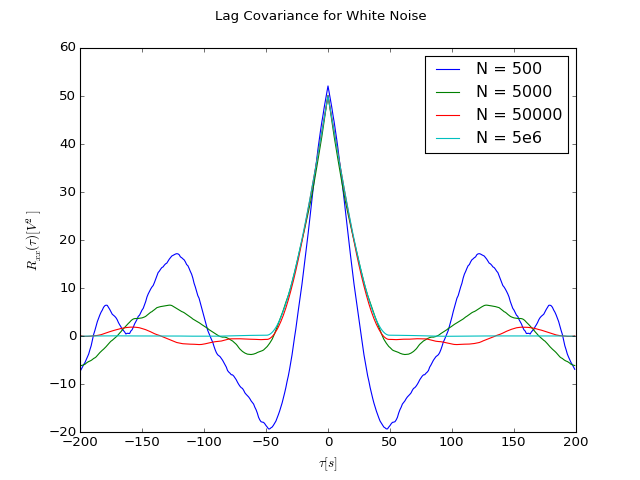

(<matplotlib.text.Text at 0xa589978>, <matplotlib.text.Text at 0xa5847b8>)

In [3]:
# YOUR CODE HERE
def lagcorr(N, lags, B):
    y = np.random.randn(N)
    t= np.linspace(0,B)
    x = np.convolve(y,t,'same')
    rxx = 0.*np.array(lags)
    for ind,tau in enumerate(lags):
        if tau<0:
            rxx[ind]=np.mean(x[:tau]*x[-tau:])
        elif tau==0:
            rxx[ind]=np.mean(x*x)
        else:
            rxx[ind]=np.mean(x[:-tau]*x[tau:]) 
    rxx = (rxx/np.var(x))*B
    return rxx

b = 50
lags = range(-200,200)
rxx1 = lagcorr(500, lags, b)
rxx2 = lagcorr(5000, lags, b)
rxx3 = lagcorr(50000, lags, b)
rxx4 = lagcorr(5e6, lags, b)
 
fig,ax=plt.subplots(1,1)
ax.plot(lags,rxx1, label='N = 500')
ax.plot(lags,rxx2, label ='N = 5000')
ax.plot(lags,rxx3, label = 'N = 50000')
ax.plot(lags,rxx4, label = 'N = 5e6')
fig.suptitle('Lag Covariance for White Noise'),ax.legend(loc=0)
ax.set_xlabel(r'$\tau [s]$'),ax.set_ylabel(r'$R_{xx}(\tau) [V^2]$')


**3** Derive (or look up) $S_{xx}(f)$ of this process:

By using the definition of $S_{xx}(f)$ given in the notes and using the fact that $R_{xx}(\tau)$ is given above we get
\begin{equation}
    S_{xx}(f) = \int_{-\infty}^{\infty} R_{xx}(\tau) e^{-j2\pi f \tau} d\tau
\end{equation}
We know that $R_{xx}(\tau)$ is only non zero when $|\tau|$ < b.
So we get a new integral 
\begin{equation}
    S_{xx}(f) = \int_{-b}^{b} (b - |\tau|) e^{-j2\pi f \tau} d\tau
\end{equation}
This can be broken up into two integral for the value of $\tau$
\begin{equation}
    S_{xx}(f) = \int_{-b}^{0} (b + \tau) e^{-j2\pi f \tau} d\tau + \int_{0}^{b} (b - \tau) e^{-j2\pi f \tau} d\tau
\end{equation}
From here it is basic intergation, and yields an end result of
\begin{equation}
    S_{xx}(f) = \frac{b(-j2\pi f) + e^{-(-j2\pi f)b} - 1}{-4 \pi^2 f^2} - \frac{-(-j2\pi f)b + e^{(-j2\pi f)b} -1}{-4 \pi^2 f^2}
\end{equation}
After cancellation and squaring together terms we get
\begin{equation}
    S_{xx}(f) = \frac{e^{(-j2\pi f)b} (e^{-(-j2\pi f)b} -1)^2}{-4 \pi^2 f^2}
\end{equation}
\begin{equation}
    S_{xx}(f) = \frac{(2i)^2 sin^2(\pi fb)}{-4 \pi^2 f^2}
\end{equation}
\begin{equation}
    S_{xx}(f) = (\frac{sin(\pi fb)}{\pi f})^2
\end{equation}

**4** Demonstrate with finite values of $T$ that $\lim_{T->\infty}S_{xx}(f,T) = S_{xx}(f)$ does *not* converge to $S_{xx}(f)$.  Do this by taking longer values of $T$, fitting to the same set of $f$, and graphically showing that the spectral estimate does not improve.  (Do **not** use canned `fft` routines, unless you prove they work first.)

Hints: 
  - When you choose your discrete values of $f$, make sure you don't choose them to be too high (i.e. if you define $\Delta t=1 \ \mathrm{s}$ in your time series above, then there is no need to have frequencies greater than 1 Hz; actually no need to have them greater than 0.5 Hz, as we will see in the next lecture.
  - I would recommend writing a small funtion to do the integration for the Fourier Transform so that you are not rewriting the same code.  To do this, you would do something like:

```python
def dft(x,dt,f): 
    # where x is your time series, dt is the sample rate in seconds, 
    # and f are the frequencies in Hz you want the Fourier Series calculated on
    
    # Your code in here
    return X # where X is your Fourier tranform
```

  - Choose the length of your spectra to go up by decades (i.e. 500,5000,...)
  - use `ax.loglog(f,X)` to make your plots.  We almost always plot spectra using `loglog`.



In [4]:
print 'Talk'

Talk


<IPython.core.display.Javascript object>


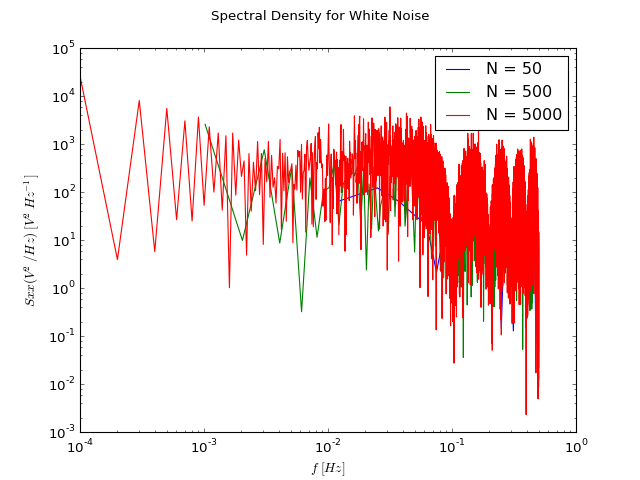

In [4]:
def dft(x, f):
    n=x.size
    ff = np.linspace(0,f,n)
    t= np.arange(n)
    X =x*0.  
    for num in np.arange(n):
        X[num] = np.abs(np.sum(x*np.exp(-1j*2.*np.pi*t*ff[num])))
    return X,ff

f = 0.5
b = 10
x = np.convolve(np.random.randn(50), np.ones(b), mode='valid')
X,f1 = dft(x,f)
y = np.convolve(np.random.rand(500),np.ones(b),mode='valid')
Y,f2 = dft(y,f)
w = np.convolve(np.random.rand(5000),np.ones(b),mode='valid')
W,f3 = dft(w,f)
#z = np.convolve(np.random.rand(50000),np.ones(b),mode='valid')
#Z,f4 = dft(z,f)
fig,ax=plt.subplots(1,1)
ax.loglog(f1,X*np.conj(X)*f1, label='N = 50')
ax.loglog(f2,Y*np.conj(Y)*f2, label='N = 500')
ax.loglog(f3,W*np.conj(W)*f3, label='N = 5000')
#ax.loglog(f4,Z*np.conj(Z)*f4, label='N = 50000')
fig.suptitle('Spectral Density for White Noise')
ax.set_xlabel(r'$f\ [Hz]$')
ax.set_ylabel(r'$Sxx(V^2 / Hz)\ [V^2 Hz^{-1}]$')
ax.legend(loc=0)

**5** Now demonstrate that the *expected value* of 

$$E\left[\lim_{T->\infty}S_{xx}(f,T)\right]$$ 

approaches $S_{xx}(f)$ by *averaging* a number of your moderate lengthed spectral estimates together.  Comment on the form of the spectrum relative to how you made the timeseries.

Hints:
  
  - Just do what you did above, but average the results of `navg` non-overlapping segments of data.  
  - This gets computationally expensive, I did `navg` of `1, 5, 50, 100` and got nice results.  Test your code on just `navg` of `1` and `5`, and when its working add the higher numbers.

<IPython.core.display.Javascript object>


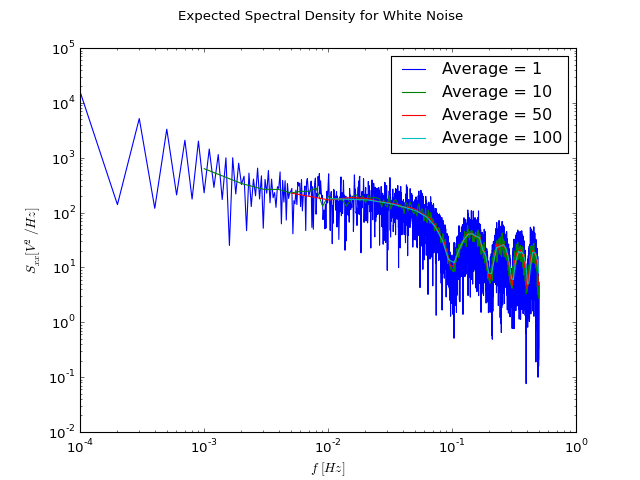

In [5]:
def sdf_avg(x, N, f):
    p = x.size/N
    newf = np.linspace(0,f,p)    
    newx = np.zeros(p)
    for i in range(p):
        newx[i] = np.mean(x[N*i:(N*i)+N])
    return newx , newf

f = 0.5        
newX, newfx = sdf_avg(W, 1, f)
newY, newfy = sdf_avg(W, 10, f)
newW, newfw = sdf_avg(W, 50, f)
newZ, newfz = sdf_avg(W, 100, f)

fig,ax=plt.subplots(1,1)
ax.loglog(newfx, newX, label='Average = 1')
ax.loglog(newfy, newY, label='Average = 10')
ax.loglog(newfw, newW, label='Average = 50')
ax.loglog(newfz, newZ, label='Average = 100')
fig.suptitle('Expected Spectral Density for White Noise')
ax.set_xlabel(r'$f\ [Hz]$')
ax.set_ylabel(r'$S_{xx} [V^2/Hz]$')
ax.legend(loc=0)

Comparing the new plots to the old plot (in blue) we can see that the amount of noise produced has greatly ruduced the more the arrays were split and averaged. As the non-overlaping bits of data were increased a more steady line for the $S_{xx}$ was defined.